### Math 677 - Assignment 10
### UIN - 733000826
### Name : Sneha Mishra

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import linalg as LA
import cvxpy as cp

In [3]:
# Function to find inscribed radius of any polytope

def find_radius(d,p):
    
    # Conjugate index
    q = p / (p-1)

    A = np.row_stack((np.ones((1,d)), -np.eye(d) ))
    B = np.row_stack((1, np.zeros((d, 1))))

    rownorms = np.zeros((d+1,1))

    for i in range(d+1):
        rownorms[i] = LA.norm(A[i,:], q)

    center = cp.Variable((d,1))
    radius = cp.Variable(1)
    objective = cp.Maximize(radius)
    constraints = [A@center + radius*rownorms <= B]
    inscribed_circle = cp.Problem(objective, constraints)
    inscribed_circle.solve()
    radius_val = radius.value[0]
    return radius_val

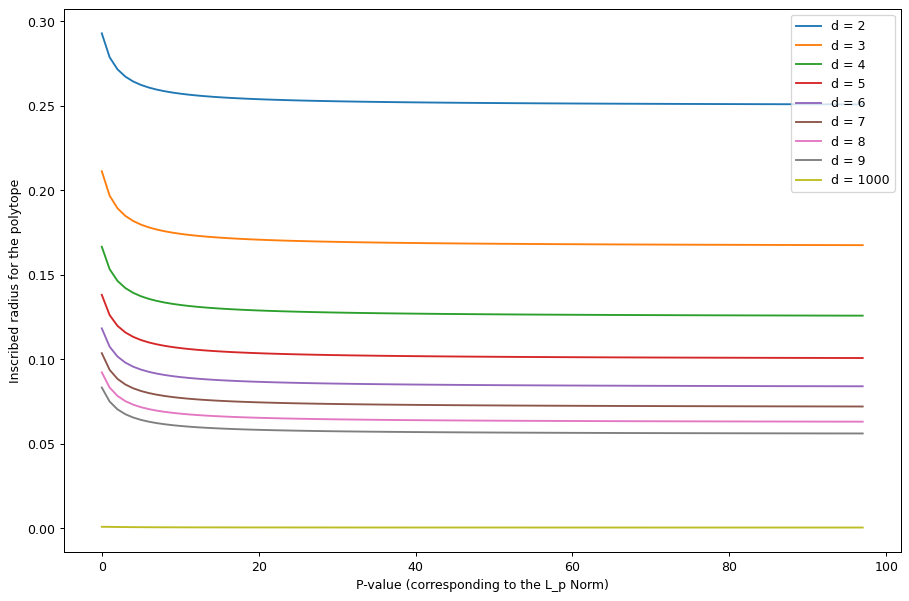

In [4]:
figure(figsize=(12, 8), dpi=90)

# For various 'd' and 'p' values - find the inscribed radius
d_dict = {}

# For each d-value find the inscribed radius for all lp norms
for d in range(2,10):
    d_dict[d] = []
    
    # For each p-value find the inscribed radius
    for p in range(2,100):
        d_dict[d].append(find_radius(p=p,d=d))
    plt.plot(d_dict[d])

# For a very high value of d
d = 1000
d_dict[d] = []
for p in range(2,100):
    d_dict[d].append(find_radius(p=p,d=1000))
plt.plot(d_dict[d])
    
plt.legend(['d = '+str(k) for k in d_dict.keys()])
plt.xlabel("P-value (corresponding to the L_p Norm)")
plt.ylabel("Inscribed radius for the polytope")
plt.show()